# Package Import

In [ ]:
!pip install dataframe-image

In [2]:
import csv
import pandas as pd
import dataframe_image as dfi
import matplotlib.pyplot as plt
import re
import numpy as np

In [7]:
# 숫자 포맷팅 함수 정의
def format_with_commas(number):
    return '{:,}'.format(number)

# 2023년 특수교육 주요 현황_p.7

### Make CSV

In [2]:
data = [
    ["장애영역별", "특수학교", "일반학교 특수학급", "일반학교 일반학급(전일제 통합학급)", "특수교육 지원센터", "계"],
    ["시각장애", 1079, 207, 458, 1, 1745],
    ["청각장애", 560, 689, 1646, 12, 2907],
    ["지적장애", 14540, 35855, 5457, 15, 55867],
    ["지체장애", 3905, 3232, 2326, 59, 9522],
    ["정서·행동장애", 68, 1186, 577, 0, 1831],
    ["자폐성장애", 7781, 10183, 1307, 4, 19275],
    ["의사소통장애", 206, 1396, 1042, 1, 2645],
    ["학습장애", 10, 628, 399, 0, 1037],
    ["건강장애", 13, 109, 1834, 0, 1956],
    ["발달지체", 780, 8508, 3428, 202, 12918],
    ["계", 28942, 61993, 18474, 294, 109703]
]

# CSV 파일로 저장
filename = 'csv/2023년 특수교육 주요 현황_p.7.csv'
with open(filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"{filename} 파일이 성공적으로 저장되었습니다.")

csv/2023년 특수교육 주요 현황_p.7.csv 파일이 성공적으로 저장되었습니다.


### Data Preprocessing & Visualization

In [3]:
df1 = pd.read_csv('csv/2023년 특수교육 주요 현황_p.7.csv', encoding = "utf-8")
df1.drop(df1.tail(1).index, inplace=True)
df1

,장애영역별,특수학교,일반학교 특수학급,일반학교 일반학급(전일제 통합학급),특수교육 지원센터,계
0,시각장애,1079,207,458,1,1745
1,청각장애,560,689,1646,12,2907
2,지적장애,14540,35855,5457,15,55867
3,지체장애,3905,3232,2326,59,9522
4,정서·행동장애,68,1186,577,0,1831
5,자폐성장애,7781,10183,1307,4,19275
6,의사소통장애,206,1396,1042,1,2645
7,학습장애,10,628,399,0,1037
8,건강장애,13,109,1834,0,1956
9,발달지체,780,8508,3428,202,12918


In [8]:
df_1 = df1.copy()
df_1.loc[10] = ['발달장애', df_1.loc[[2, 4, 5, 9], '특수학교'].sum(), df_1.loc[[2, 4, 5, 9], '일반학교 특수학급'].sum(), df_1.loc[[2, 4, 5, 9], '일반학교 일반학급(전일제 통합학급)'].sum(), df_1.loc[[2, 4, 5, 9], '특수교육 지원센터'].sum(), df_1.loc[[2, 4, 5, 9], '계'].sum()]

# 발달장애를 포함한 행 제거
df_1 = df_1.drop(index=[2, 4, 5, 9])
df_1

df_1 = df_1.copy()
for col in df_1.columns[1:]:
    df_1[col] = df_1[col].apply(format_with_commas)

df_1 = df_1.style.hide(axis='index')
dfi.export(df_1, 'result_df/발달장애 비율_p.7.png')

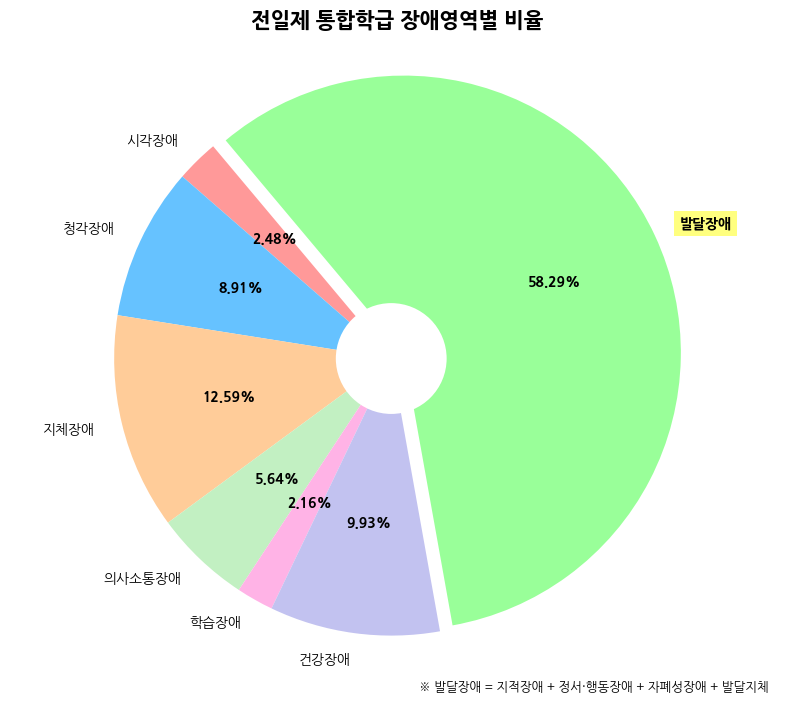

In [5]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 색상 설정 (파스텔 계열)
colors = ['#ff9999', '#66c2ff', '#ffcc99', '#c2f0c2', '#ffb3e6', '#c2c2f0', '#99ff99']
explode = (0, 0, 0, 0, 0, 0, 0.05)

# 파이차트 그리기
plt.figure(figsize=(10, 8))

wedges, texts, autotexts = plt.pie(df_1.loc[:, '일반학교 일반학급(전일제 통합학급)'], labels=df_1.loc[:, '장애영역별'], 
                                   autopct="%1.2f%%", startangle=130, colors=colors, explode=explode)

plt.setp(autotexts, size=10, weight="bold") 

for text in texts:
    if text.get_text() == '발달장애':
        text.set_fontweight('bold')
        text.set_bbox(dict(facecolor='yellow', alpha=0.5, edgecolor=None, linewidth=0))

# 중앙에 원 추가 (도넛 형태)
centre_circle = plt.Circle((0,0),0.2,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0.1, -1.2, '※ 발달장애 = 지적장애 + 정서·행동장애 + 자폐성장애 + 발달지체', fontsize=9)

plt.title('전일제 통합학급 장애영역별 비율', y=1.02, fontsize=15, weight='bold')
plt.axis('equal') 

plt.savefig('result_img/전일제 통합학급 발달장애 비율 비율_p.7.png')
plt.show()

In [9]:
df_2 = df1.copy()
df_2.loc[10] = ['발달장애 수반 장애', df_2.loc[[2, 4, 5, 6, 7, 9], '특수학교'].sum(), 
                df_2.loc[[2, 4, 5, 6, 7, 9], '일반학교 특수학급'].sum(), df_2.loc[[2, 4, 5, 6, 7, 9], 
                '일반학교 일반학급(전일제 통합학급)'].sum(), df_2.loc[[2, 4, 5, 6, 7, 9], 
                '특수교육 지원센터'].sum(), df_2.loc[[2, 4, 5, 6, 7, 9], '계'].sum()]

# 발달장애를 포함한 행 제거
df_2 = df_2.drop(index=[2, 4, 5, 6, 7, 9])
df_2

df_2 = df_2.copy()
for col in df_2.columns[1:]:
    df_2[col] = df_2[col].apply(format_with_commas)

df_2 = df_2.style.hide(axis='index')
dfi.export(df_2, 'result_df/발달장애 수반 장애 비율_p.7.png')

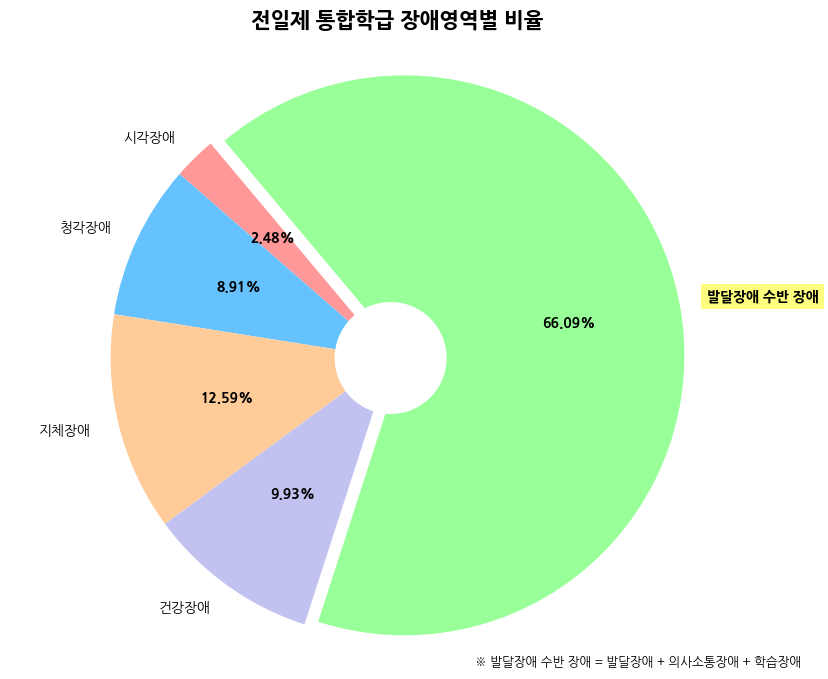

In [7]:
# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 색상 설정 (파스텔 계열)
colors = ['#ff9999', '#66c2ff', '#ffcc99', '#c2c2f0', '#99ff99']
explode = (0, 0, 0, 0, 0.05)

# 파이차트 그리기
plt.figure(figsize=(10, 8))


wedges, texts, autotexts = plt.pie(df_2.loc[:, '일반학교 일반학급(전일제 통합학급)'],
                                   labels=df_2.loc[:, '장애영역별'], autopct="%1.2f%%", startangle=130, 
                                   colors=colors, explode=explode)
plt.setp(autotexts, size=10, weight="bold")  

for text in texts:
    if text.get_text() == '발달장애 수반 장애':
        text.set_fontweight('bold')
        text.set_bbox(dict(facecolor='yellow', alpha=0.5, edgecolor=None, linewidth=0))

# 중앙에 원 추가 (도넛 형태)
centre_circle = plt.Circle((0,0),0.2,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0.3, -1.1, '※ 발달장애 수반 장애 = 발달장애 + 의사소통장애 + 학습장애', fontsize=9)

plt.title('전일제 통합학급 장애영역별 비율', y=1.02, fontsize=15, weight='bold')
plt.axis('equal')  

plt.savefig('result_img/전일제 통합학급 발달장애 수반 장애 비율_p.7.png')
plt.show()

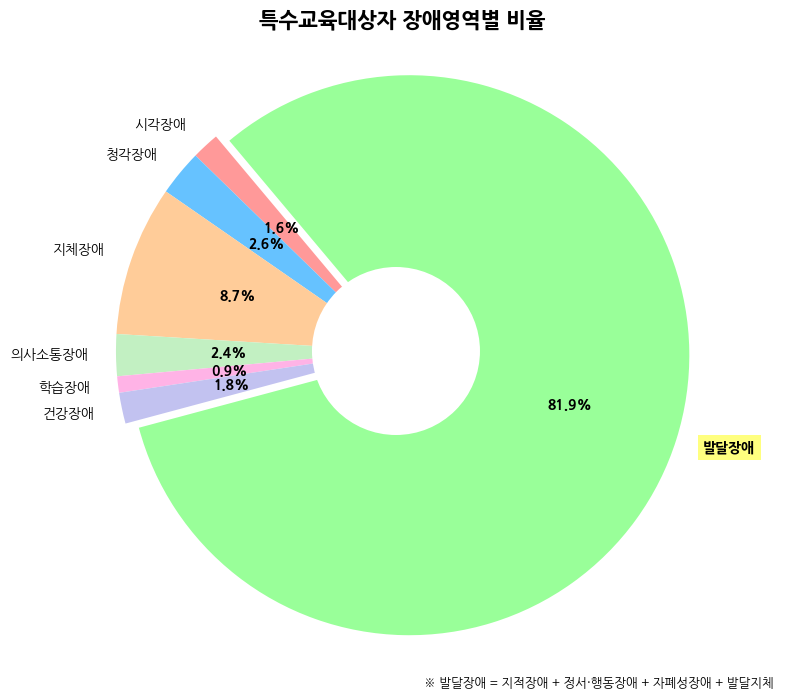

In [8]:
df1 = pd.read_csv('csv/2023년 특수교육 주요 현황_p.7.csv', encoding = 'utf-8')

# '장애영역별'과 '계' 컬럼만 추출
df1 = df1[['장애영역별', '계']]

# '발달장애' 행 추가
df1.loc[len(df1)] = ['발달장애', df1.loc[df1['장애영역별'].isin(['지적장애', '자폐성장애', '정서·행동장애', '발달지체']), '계'].sum()]

# '지적장애'와 '자폐성장애' 행 제거
df1 = df1[~df1['장애영역별'].isin(['지적장애', '자폐성장애', '정서·행동장애', '발달지체', '계'])]

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 색상 설정 (파스텔 계열)
colors = ['#ff9999', '#66c2ff', '#ffcc99', '#c2f0c2', '#ffb3e6', '#c2c2f0', '#99ff99']
# , '#ffb3b3', '#ffccff'
explode = (0, 0, 0, 0, 0, 0, 0.05)

# 파이차트 그리기
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(df1.loc[:, '계'], labels=df1.loc[:, '장애영역별'], autopct='%1.1f%%', 
                                   startangle=130, colors=colors, explode=explode)
plt.setp(autotexts, size=10, weight="bold") 

for text in texts:
    if text.get_text() == '발달장애':
        text.set_fontweight('bold')
        text.set_bbox(dict(facecolor='yellow', alpha=0.5, edgecolor=None, linewidth=0))

# 중앙에 원 추가 (도넛 형태)
centre_circle = plt.Circle((0,0),0.3,fc='white')  
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0.1, -1.2, '※ 발달장애 = 지적장애 + 정서·행동장애 + 자폐성장애 + 발달지체', fontsize=9)

plt.title('특수교육대상자 장애영역별 비율', y=1.02, fontsize=15, weight='bold')
plt.axis('equal')  

plt.savefig('result_img/특수교육대상자 발달장애 비율_p.7.png')
plt.show()

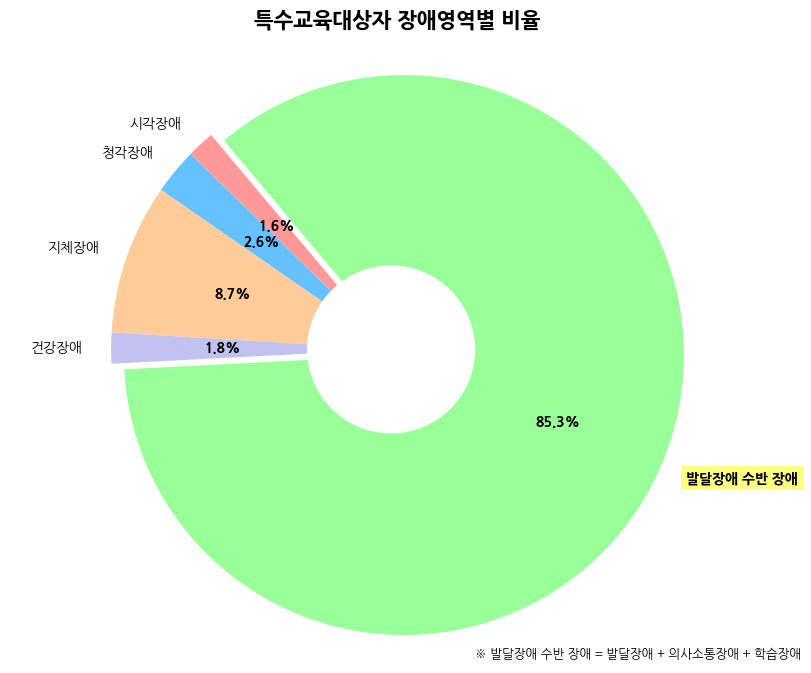

In [9]:
df1 = pd.read_csv('csv/2023년 특수교육 주요 현황_p.7.csv', encoding = 'utf-8')

# '장애영역별'과 '계' 컬럼만 추출
df1 = df1[['장애영역별', '계']]

# '발달장애' 행 추가
df1.loc[len(df1)] = ['발달장애 수반 장애', df1.loc[df1['장애영역별'].isin(['지적장애', '자폐성장애', '정서·행동장애', 
                                                              '발달지체', '학습장애', '의사소통장애']), '계'].sum()]

# '지적장애'와 '자폐성장애' 행 제거
df1 = df1[~df1['장애영역별'].isin(['지적장애', '자폐성장애', '정서·행동장애', '발달지체', '학습장애', '의사소통장애', '계'])]

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

colors = ['#ff9999', '#66c2ff', '#ffcc99', '#c2c2f0', '#99ff99']
explode = (0, 0, 0, 0, 0.05)

# 파이차트 그리기
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(df1.loc[:, '계'], labels=df1.loc[:, '장애영역별'], autopct='%1.1f%%', 
                                   startangle=130, colors=colors, explode=explode)
plt.setp(autotexts, size=10, weight="bold") 

for text in texts:
    if text.get_text() == '발달장애 수반 장애':
        text.set_fontweight('bold')
        text.set_bbox(dict(facecolor='yellow', alpha=0.5, edgecolor=None, linewidth=0))

# 중앙에 원 추가 (도넛 형태)
centre_circle = plt.Circle((0,0),0.3,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0.3, -1.1, '※ 발달장애 수반 장애 = 발달장애 + 의사소통장애 + 학습장애', fontsize=9)

plt.title('특수교육대상자 장애영역별 비율', y=1.02, fontsize=15, weight='bold')
plt.axis('equal')  

plt.savefig('result_img/특수교육대상자 발달장애 수반 장애 비율_p.7.png')
plt.show()

### Dataframe to png

In [11]:
df1 = pd.read_csv('csv/2023년 특수교육 주요 현황_p.7.csv', encoding = "utf-8")

# DataFrame의 숫자 열에 포맷팅 함수 적용
df1_num = df1.copy()
for col in df1_num.columns[1:]:
    df1_num[col] = df1_num[col].apply(format_with_commas)

df1_num = df1_num.style.hide(axis='index')

dfi.export(df1_num, 'result_df/2023년 특수교육 주요 현황_p.7.png')

# 연도별 장애영역별 학생 수_p.8

### Make CSV 

In [12]:
data = [
    ["연도", "시각장애", "청각장애", "지적장애", "지체장애", "정서·행동장애", "자폐성장애", "의사소통장애", "학습장애", "건강장애", "발달지체", "전체"],
    ["2019", "1,937 (2.1)", "3,225 (3.5)", "49,624 (53.4)", "10,200 (11.0)", "2,182 (2.3)", "13,105 (14.1)", "2,204 (2.4)", "1,409 (1.5)", "1,763 (1.9)", "7,309 (7.8)", "92,958 (100)"],
    ["2020", "1,908 (2.0)", "3,132 (3.3)", "50,693 (53.1)", "9,928 (10.4)", "1,993 (2.1)", "13,917 (14.6)", "2,404 (2.5)", "1,226 (1.3)", "1,785 (1.9)", "8,434 (8.8)", "95,420 (100)"],
    ["2021", "1,826 (1.9)", "3,026 (3.1)", "51,788 (52.8)", "9,695 (9.9)", "1,874 (1.9)", "15,215 (15.5)", "2,450 (2.5)", "1,114 (1.1)", "1,799 (1.8)", "9,367 (9.5)", "98,154 (100)"],
    ["2022", "1,753 (1.7)", "2,961 (2.9)", "53,718 (51.8)", "9,639 (9.3)", "1,865 (1.8)", "17,024 (16.4)", "2,622 (2.5)", "1,078 (1.0)", "1,948 (1.9)", "11,087 (10.7)", "103,695 (100)"],
    ["2023", "1,745 (1.6)", "2,907 (2.6)", "55,867 (50.9)", "9,522 (8.7)", "1,831 (1.7)", "19,275 (17.6)", "2,645 (2.4)", "1,037 (0.9)", "1,956 (1.8)", "12,918 (11.8)", "109,703 (100)"]
]

filename = 'csv/연도별 장애영역별 학생 수_p.8.csv'
with open(filename, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"{filename} 파일이 성공적으로 저장되었습니다.")

csv/연도별 장애영역별 학생 수_p.8.csv 파일이 성공적으로 저장되었습니다.


### Data Preprocessing & Visualization

In [13]:
df2 = pd.read_csv('csv/연도별 장애영역별 학생 수_p.8.csv', encoding = "utf-8")
df2

,연도,시각장애,청각장애,지적장애,지체장애,정서·행동장애,자폐성장애,의사소통장애,학습장애,건강장애,발달지체,전체
0,2019,"1,937 (2.1)","3,225 (3.5)","49,624 (53.4)","10,200 (11.0)","2,182 (2.3)","13,105 (14.1)","2,204 (2.4)","1,409 (1.5)","1,763 (1.9)","7,309 (7.8)","92,958 (100)"
1,2020,"1,908 (2.0)","3,132 (3.3)","50,693 (53.1)","9,928 (10.4)","1,993 (2.1)","13,917 (14.6)","2,404 (2.5)","1,226 (1.3)","1,785 (1.9)","8,434 (8.8)","95,420 (100)"
2,2021,"1,826 (1.9)","3,026 (3.1)","51,788 (52.8)","9,695 (9.9)","1,874 (1.9)","15,215 (15.5)","2,450 (2.5)","1,114 (1.1)","1,799 (1.8)","9,367 (9.5)","98,154 (100)"
3,2022,"1,753 (1.7)","2,961 (2.9)","53,718 (51.8)","9,639 (9.3)","1,865 (1.8)","17,024 (16.4)","2,622 (2.5)","1,078 (1.0)","1,948 (1.9)","11,087 (10.7)","103,695 (100)"
4,2023,"1,745 (1.6)","2,907 (2.6)","55,867 (50.9)","9,522 (8.7)","1,831 (1.7)","19,275 (17.6)","2,645 (2.4)","1,037 (0.9)","1,956 (1.8)","12,918 (11.8)","109,703 (100)"


In [14]:
df_3 = df2.copy()

def clean_and_convert(s):
    s = re.sub(r'\([^)]*\)', '', s)  # 괄호와 괄호 안의 내용 제거
    s = s.replace(',', '')  # 쉼표(,) 제거
    return int(s)

for col in df_3.columns[1:]:
    df_3[col] = df_3[col].apply(clean_and_convert)

df_3['발달장애'] = df_3['지적장애'] + df_3['정서·행동장애'] + df_3['자폐성장애'] + df_3['발달지체']
df_3 = df_3[['연도','발달장애','전체']]
df_3['비율'] = (df_3['발달장애'] / df_3['전체'] * 100).round(2)
df_3 = df_3[['연도','발달장애','비율']]
df_3

,연도,발달장애,비율
0,2019,72220,77.69
1,2020,75037,78.64
2,2021,78244,79.72
3,2022,83694,80.71
4,2023,89891,81.94


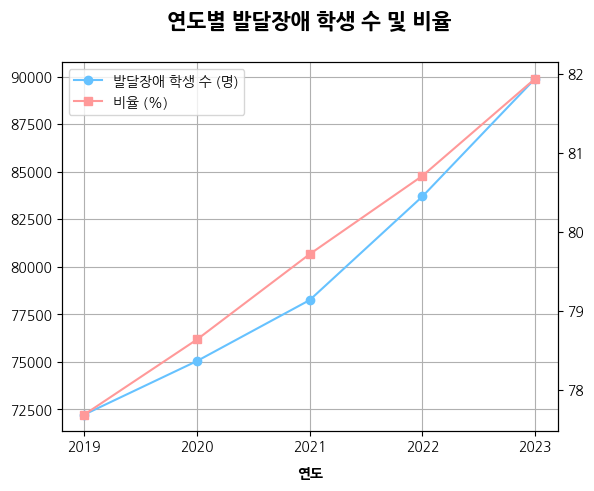

In [15]:
fig, ax1 = plt.subplots()

# 왼쪽 y 축 (발달장애)
line1, = ax1.plot(df_3['연도'], df_3['발달장애'], color='#66c2ff', marker='o', label='발달장애 학생 수 (명)')

# 오른쪽 y 축 (비율)
ax2 = ax1.twinx()
line2, = ax2.plot(df_3['연도'], df_3['비율'], color='#ff9999', marker='s', label='비율 (%)')

# 범례 추가
lines = [line1, line2]
plt.legend(lines, [line.get_label() for line in lines])

# xticks 설정
ax1.set_xticks(df_3['연도'])
ax1.grid(True)

ax1.set_xlabel('연도', fontsize=10, weight='bold', labelpad=10)

plt.title('연도별 발달장애 학생 수 및 비율', y=1.02, fontsize=15, weight='bold', pad=20)
plt.savefig('result_img/연도별 발달장애 학생 수 및 비율_p.8.png')
plt.show()


### Dataframe to png

In [16]:
df2 = pd.read_csv('csv/연도별 장애영역별 학생 수_p.8.csv', encoding = "utf-8")
df2 = df2.style.hide(axis='index')
dfi.export(df2, 'result_df/연도별 장애영역별 학생 수_p.8.png')

# 시도별 개황_p.13.csv

### Make CSV

In [17]:
data = [
    ["시도", "특수학교 학교 수", "특수학교 학급 수", "특수학교 학생 수", "특수학교 교원 수", "특수학교 일반직", "특수학급 학교 수", "특수학급 학급 수", "특수학급 학생 수", "특수학급 교사 수", "일반학급 학교 수", "일반학급 학급 수", "일반학급 학생 수", "특수교육지원센터 장애 영아", "특수교육지원센터 교사(정규)", "학생 계"],
    ["계", 194, 5443, 28942, 10146, 1813, 9288, 13287, 61993, 13888, 8366, 17497, 18474, 294, 1565, 109703],
    ["서울", 32, 856, 4483, 1547, 365, 936, 1588, 7167, 1658, 1010, 2151, 2195, 43, 101, 13888],
    ["부산", 15, 371, 2022, 690, 130, 524, 640, 3297, 652, 649, 1701, 1816, 0, 54, 7135],
    ["대구", 11, 334, 1908, 678, 80, 339, 469, 2205, 486, 509, 1311, 1399, 6, 87, 5518],
    ["인천", 10, 352, 1946, 588, 55, 509, 793, 4096, 818, 550, 1474, 1589, 17, 102, 7648],
    ["광주", 5, 228, 1170, 425, 32, 244, 322, 1582, 336, 258, 600, 634, 0, 44, 3386],
    ["대전", 6, 196, 1122, 368, 53, 282, 390, 1922, 414, 240, 487, 491, 6, 55, 3541],
    ["울산", 4, 151, 775, 254, 41, 226, 341, 1621, 346, 222, 491, 510, 4, 39, 2910],
    ["세종", 2, 48, 229, 79, 14, 128, 153, 659, 153, 71, 129, 137, 0, 16, 1025],
    ["경기", 38, 953, 5419, 2080, 370, 2354, 3628, 17535, 3998, 1804, 3742, 3930, 79, 357, 26963],
    ["강원", 9, 199, 866, 320, 73, 370, 407, 1789, 407, 288, 460, 476, 3, 55, 3134],
    ["충북", 11, 289, 1384, 496, 87, 428, 579, 2584, 584, 306, 677, 712, 10, 100, 4690],
    ["충남", 10, 279, 1342, 494, 79, 551, 818, 3716, 830, 336, 491, 523, 2, 89, 5583],
    ["전북", 10, 216, 1119, 388, 79, 412, 505, 2220, 509, 471, 859, 934, 0, 86, 4273],
    ["전남", 9, 220, 1197, 424, 106, 565, 728, 2832, 731, 226, 290, 307, 0, 72, 4336],
    ["경북", 8, 254, 1501, 456, 131, 579, 727, 3159, 741, 644, 1103, 1188, 30, 130, 5878],
    ["경남", 11, 392, 1914, 676, 92, 726, 1034, 4604, 1035, 613, 1133, 1209, 7, 143, 7734],
    ["제주", 3, 105, 545, 183, 26, 115, 165, 1005, 190, 169, 398, 424, 87, 35, 2061]
]

# CSV 파일로 저장
filename = 'csv/시도별 개황_p.13.csv'
with open(filename, 'w', newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"{filename} 파일이 성공적으로 저장되었습니다.")

csv/시도별 개황_p.13.csv 파일이 성공적으로 저장되었습니다.


### Data Preprocessing & Visualization

In [6]:
df3 = pd.read_csv('csv/시도별 개황_p.13.csv', encoding = "utf-8")
df3 = df3[['시도','특수학교 학생 수', '특수학교 교원 수', '특수학급 학생 수', '특수학급 교사 수']]
df3['시도별 특수학교 교원 대비 학생 수'] = (df3['특수학교 학생 수'] / df3['특수학교 교원 수']).round(2)
df3['시도별 특수학급 교사 대비 학생 수'] = (df3['특수학급 학생 수'] / df3['특수학급 교사 수']).round(2)
df3 = df3[['시도','시도별 특수학교 교원 대비 학생 수','시도별 특수학급 교사 대비 학생 수']]
df3.loc[df3['시도'] == '계', '시도'] = '전국'
df3

df3 = df3.copy()
for col in df3.columns[1:]:
    df3[col] = df3[col].apply(format_with_commas)

df3 = df3.style.hide(axis='index')
dfi.export(df3, 'result_df/시도별 교사 대비 학생 수_p.13.png')

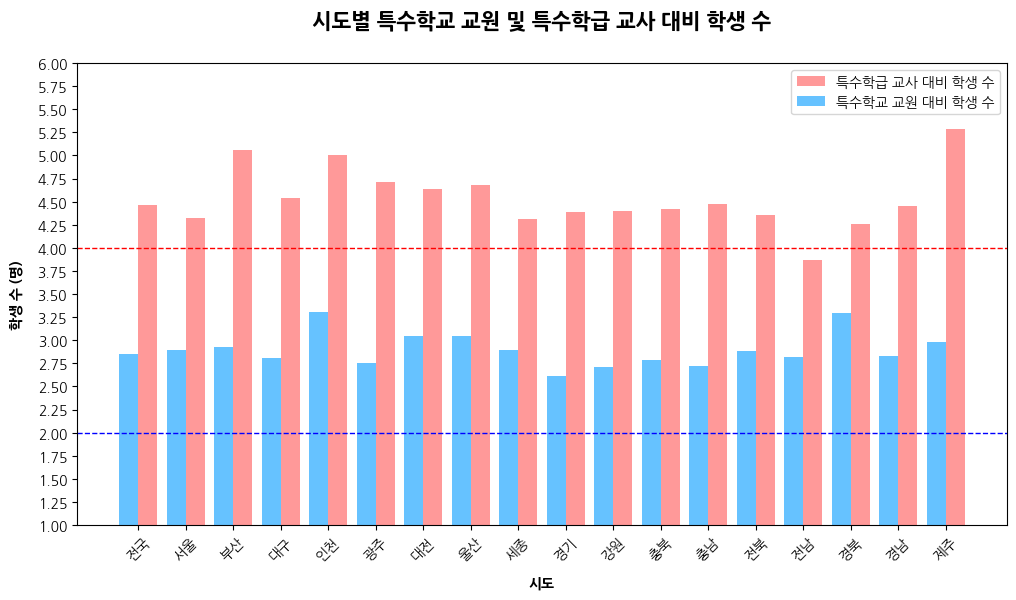

In [19]:
# 막대그래프를 그리기 위한 위치 설정
x = np.arange(len(df3['시도']))

# 막대그래프 그리기
width = 0.4  # 막대의 너비 설정

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x + width/2, df3['시도별 특수학급 교사 대비 학생 수'], width, label='특수학급 교사 대비 학생 수', color='#ff9999')
bars2 = ax.bar(x - width/2, df3['시도별 특수학교 교원 대비 학생 수'], width, label='특수학교 교원 대비 학생 수', color='#66c2ff')

# x 축 설정
ax.set_xticks(x)
ax.set_xticklabels(df3['시도'])
ax.legend()

ax.set_ylim(1, 6)
y_ticks = np.arange(1, 6.25, 0.25)  # 2부터 6까지 0.25 단위로 눈금 설정
ax.set_yticks(y_ticks)

# 라벨과 타이틀 설정
ax.set_xlabel('시도', fontsize=10, weight='bold', labelpad=10)
ax.set_ylabel('학생 수 (명)', fontsize=10, weight='bold', labelpad=10)
ax.set_title('시도별 특수학교 교원 및 특수학급 교사 대비 학생 수', y=1.02, fontsize=15, weight='bold', pad=20)

# 2와 4에 빨간 점선 추가
ax.axhline(y=2, color='blue', linestyle='--', linewidth=1)
ax.axhline(y=4, color='red', linestyle='--', linewidth=1)

plt.xticks(rotation=45)  # x 축 라벨 회전
plt.legend(loc='upper right')

plt.savefig('result_img/시도별 특수학교 교원 및 특수학급 교사 대비 학생 수_p.13.png')
plt.show()

### Dataframe to png

In [21]:
df3 = pd.read_csv('csv/시도별 개황_p.13.csv', encoding = "utf-8")

# 숫자 포맷팅 함수 정의
def format_with_commas(number):
    return '{:,}'.format(number)

# DataFrame의 숫자 열에 포맷팅 함수 적용
df3_num = df3.copy()
for col in df3_num.columns[1:]:
    df3_num[col] = df3_num[col].apply(format_with_commas)

df3_num = df3_num.style.hide(axis='index')

dfi.export(df3_num, 'result_df/시도별 개황_p.13.png')

# p.15

### Make Dataframe

In [22]:
data = [
    ["연도", "특수학교 학생 수", "특수학급 학생 수", "특수학교 교원 수", "특수학급 교원 수"],
    ["2019", 26084, 50812, 8746, 11477],
    ["2020", 26299, 52744, 9161, 12079],
    ["2021", 27027, 54266, 9501, 12718],
    ["2022", 27979, 57948, 9866, 13632],
    ["2023", 28942, 61993, 10146, 13888],
]

df4 = pd.DataFrame(data[1:], columns=data[0])

### Data Preprocessing & Visualization

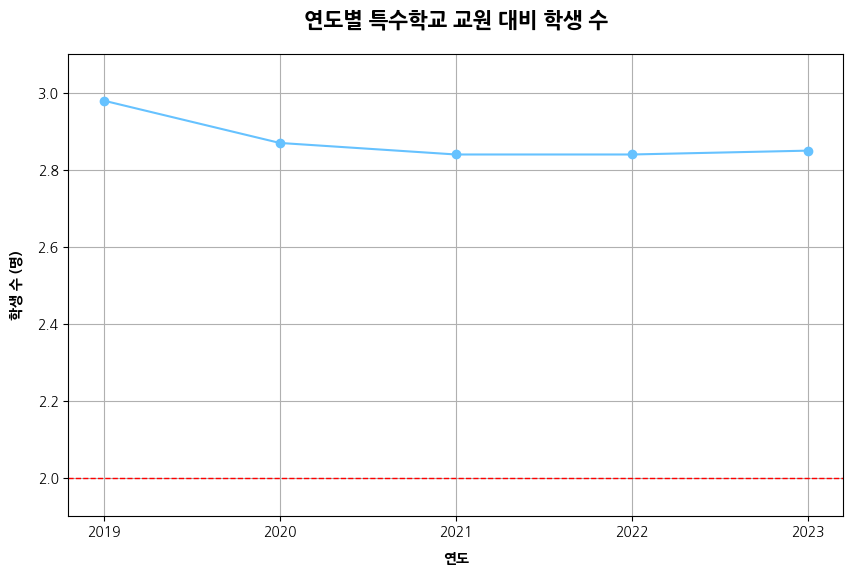

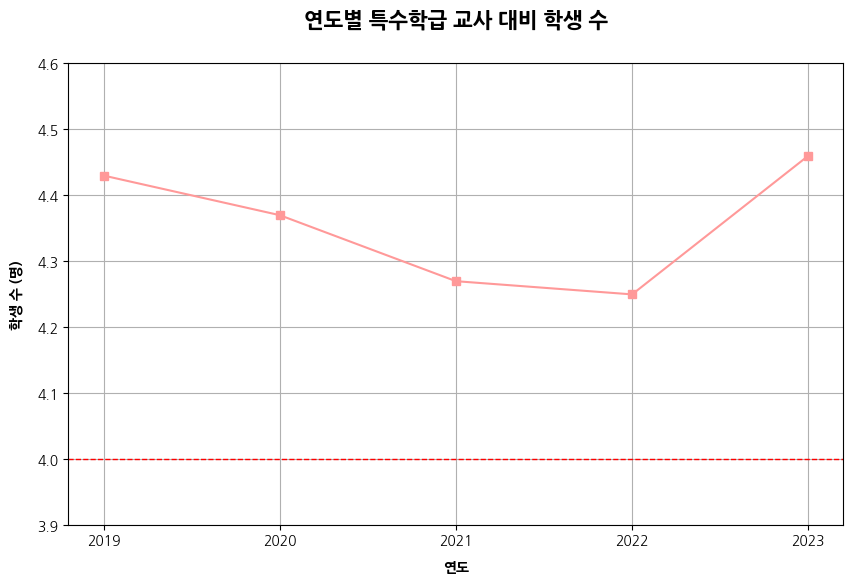

In [23]:
# 새로운 열 추가
df4['특수학교 교원 대비 학생 수'] = (df4['특수학교 학생 수'] / df4['특수학교 교원 수']).round(2)
df4['특수학급 교사 대비 학생 수'] = (df4['특수학급 학생 수'] / df4['특수학급 교원 수']).round(2)
df4 = df4[['연도','특수학교 교원 대비 학생 수', '특수학급 교사 대비 학생 수']]

years = df4['연도']
special_school_ratio = df4['특수학교 교원 대비 학생 수']
special_class_ratio = df4['특수학급 교사 대비 학생 수']

# 특수학교 비율 그래프
plt.figure(figsize=(10, 6))
plt.plot(years, special_school_ratio, marker='o', color='#66c2ff')
plt.xlabel('연도', fontsize=10, weight='bold', labelpad=10)
plt.ylabel('학생 수 (명)', fontsize=10, weight='bold', labelpad=10)
plt.title('연도별 특수학교 교원 대비 학생 수', fontsize=15, weight='bold', pad=20)
plt.xticks(years)
plt.ylim(1.9, 3.1)  # y 축 범위 설정
plt.grid(True)
plt.axhline(y=2, color='r', linestyle='--', linewidth=1)
plt.savefig('result_img/연도별 특수학교 교원 대비 학생 수_p.15.png')
plt.show()

# 특수학급 비율 그래프
plt.figure(figsize=(10, 6))
plt.plot(years, special_class_ratio, marker='s', color='#ff9999')
plt.xlabel('연도', fontsize=10, weight='bold', labelpad=10)
plt.ylabel('학생 수 (명)', fontsize=10, weight='bold', labelpad=10)
plt.title('연도별 특수학급 교사 대비 학생 수', y=1.02, fontsize=15, weight='bold', pad=20)
plt.xticks(years)
plt.ylim(3.9, 4.6)  # y 축 범위 설정
plt.grid(True)
plt.axhline(y=4, color='r', linestyle='--', linewidth=1)
plt.savefig('result_img/연도별 특수학급 교사 대비 학생 수_p.15.png')
plt.show()


### Dataframe to png

In [24]:
df4 = pd.DataFrame(data[1:], columns=data[0])

# 숫자 포맷팅 함수 정의
def format_with_commas(number):
    return '{:,}'.format(number)

# DataFrame의 숫자 열에 포맷팅 함수 적용
for col in df4.columns[1:]:
    df4[col] = df4[col].apply(format_with_commas)

df4 = df4.style.hide(axis='index')

dfi.export(df4, 'result_df/연도별 학생 및 교원 수 추이_p.15.png')